In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Extraction 
File main.py

## Data Cleaning & Processing

In [76]:
df = pd.read_csv('pytorch_audio_raw_data.csv')
df

,Commit ID,Commit Message,Author Name,Author Email,Date of Commit,Changed Files,Pass all checks
0,b8016e442ecb132d6dafece5d224d9b5e8fde2cd,Fixes to #3295 Improve RNN-T streaming decodin...,Jeff Hwang,jeffhwang@meta.com,2023-05-31 06:05:54,"['examples/tutorials/online_asr_tutorial.py', ...",False
1,caf3ac0749eaca441f3f2d517e0dd56a78c8840c,Disable failing GPU unit test (#3384)\n\nSumma...,atalman,atalman@fb.com,2023-05-30 17:58:48,"['.circleci/config.yml', '.circleci/config.yml...",False
2,9cdf26fdb9ec9cab933ea9a0286a68f77eb7e0bc,Use const reference (#3389)\n\nSummary:\nPull ...,Moto Hira,moto@meta.com,2023-05-30 14:20:37,"['torchaudio/csrc/sox/types.cpp', 'torchaudio/...",False
3,a81b0ed23f0351f86b73fca32522cae7015aad6d,Simplify sox namespace (#3383)\n\nSummary:\nPu...,Moto Hira,moto@meta.com,2023-05-30 14:20:37,"['torchaudio/csrc/sox/effects.cpp', 'torchaudi...",True
4,6425d46cfc15b5a7073a30cee4024434eeeac7a0,[Nova] Windows CPU Unittests on Nova (#3329)\n...,Omkar Salpekar,osalpekar@fb.com,2023-05-29 17:53:53,['.circleci/unittest/windows/scripts/install.s...,False
...,...,...,...,...,...,...,...
762,bc0fcadb4295ce414b711beed79344ac4c73def2,Add fixed random seed for Emformer RNN-T recip...,hwangjeff,iamjeffhwang@gmail.com,2022-02-11 20:59:34,['test/torchaudio_unittest/example/emformer_rn...,False
763,4d0095a528412cfec2a549204fc01d9ebb15df7a,Add training recipe for Emformer RNNT trained ...,nateanl,nizhaoheng@gmail.com,2022-02-11 20:10:45,"['examples/asr/emformer_rnnt/README.md', 'exam...",False
764,825a59763d5a400a74d5802f16d8f29f66ea7b76,Add SentencePiece model training script for Li...,hwangjeff,iamjeffhwang@gmail.com,2022-02-11 19:11:52,"['examples/asr/emformer_rnnt/README.md', 'exam...",False
765,738d2f8e4a0fb883a84178f0985a97ba74b2b569,Pass bias and dropout args to Conformer convol...,hwangjeff,iamjeffhwang@gmail.com,2022-02-11 18:12:00,['torchaudio/models/conformer.py'],False


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Commit ID        767 non-null    object
 1   Commit Message   767 non-null    object
 2   Author Name      767 non-null    object
 3   Author Email     765 non-null    object
 4   Date of Commit   767 non-null    object
 5   Changed Files    767 non-null    object
 6   Pass all checks  767 non-null    bool  
dtypes: bool(1), object(6)
memory usage: 36.8+ KB


In [78]:
df.describe()

,Commit ID,Commit Message,Author Name,Author Email,Date of Commit,Changed Files,Pass all checks
count,767,767,767,765,767,767,767
unique,767,767,73,79,763,596,2
top,b8016e442ecb132d6dafece5d224d9b5e8fde2cd,Fixes to #3295 Improve RNN-T streaming decodin...,moto,855818+mthrok@users.noreply.github.com,2023-05-09 18:25:37,"['.circleci/config.yml', '.circleci/config.yml...",False
freq,1,1,281,283,3,18,712


DataFrame trên có kích thước 767R * 7C, dựa vào df.info(), ta thấy cột Author Email có 2 giá trị null, vì vậy ta loại bỏ 2 hàng chứa 2 giá trị null này.

In [79]:
df.dropna(subset=['Author Email'], inplace=True)

Mỗi commit có 1 ID hoàn toàn khác nhau, tuy nhiên trong quá trình trích xuất dữ liệu, có thể xảy ra việc ghi đè dữ liệu lỗi, dẫn tới trùng dữ liệu, nên cần thêm 1 bước loại bỏ các hàng trùng nhau.

In [80]:
df.drop_duplicates(subset=['Commit ID'], inplace=True)

Để thuận tiện trong việc xử lí và phân tích dữ liệu dưới đây, cần thêm, bớt một số hàng, cột.
- Trích xuất ngày, tháng, năm từ cột Date of Commit

In [81]:
df['Date of Commit'] = pd.to_datetime(df['Date of Commit'])
df['Day'] = df['Date of Commit'].dt.day
df['Month'] = df['Date of Commit'].dt.month
df['Year'] = df['Date of Commit'].dt.year

- Xoá các cột không cần thiết (Author Email, Date of Commit (đã trích xuất))

In [82]:
df.drop(['Date of Commit'], axis=1, inplace=True)

In [83]:
df.head()

,Commit ID,Commit Message,Author Name,Author Email,Changed Files,Pass all checks,Day,Month,Year
0,b8016e442ecb132d6dafece5d224d9b5e8fde2cd,Fixes to #3295 Improve RNN-T streaming decodin...,Jeff Hwang,jeffhwang@meta.com,"['examples/tutorials/online_asr_tutorial.py', ...",False,31,5,2023
1,caf3ac0749eaca441f3f2d517e0dd56a78c8840c,Disable failing GPU unit test (#3384)\n\nSumma...,atalman,atalman@fb.com,"['.circleci/config.yml', '.circleci/config.yml...",False,30,5,2023
2,9cdf26fdb9ec9cab933ea9a0286a68f77eb7e0bc,Use const reference (#3389)\n\nSummary:\nPull ...,Moto Hira,moto@meta.com,"['torchaudio/csrc/sox/types.cpp', 'torchaudio/...",False,30,5,2023
3,a81b0ed23f0351f86b73fca32522cae7015aad6d,Simplify sox namespace (#3383)\n\nSummary:\nPu...,Moto Hira,moto@meta.com,"['torchaudio/csrc/sox/effects.cpp', 'torchaudi...",True,30,5,2023
4,6425d46cfc15b5a7073a30cee4024434eeeac7a0,[Nova] Windows CPU Unittests on Nova (#3329)\n...,Omkar Salpekar,osalpekar@fb.com,['.circleci/unittest/windows/scripts/install.s...,False,29,5,2023


Trước khi xuất ra file csv (đã được làm sạch), cần xem xét lại tính hợp lệ của dữ liệu
- Kiểm tra ngày tháng năm của Commit

In [84]:
df = df[df['Year'] < 2024]
df = df[(df['Month'] <= 12) & (df['Month'] >= 1)]
df = df[(df['Day'] <= 31) & (df['Day'] >= 1)]

- Kiểm tra kiểu dữ liệu của các cột

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 0 to 766
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Commit ID        765 non-null    object
 1   Commit Message   765 non-null    object
 2   Author Name      765 non-null    object
 3   Author Email     765 non-null    object
 4   Changed Files    765 non-null    object
 5   Pass all checks  765 non-null    bool  
 6   Day              765 non-null    int64 
 7   Month            765 non-null    int64 
 8   Year             765 non-null    int64 
dtypes: bool(1), int64(3), object(5)
memory usage: 54.5+ KB


Trích xuất ra file mới

In [86]:
df.to_csv('pytorch_audio_cleaned_data.csv', index=False)

## Data Analysis

In [87]:
df = pd.read_csv('pytorch_audio_cleaned_data.csv')

In [88]:
df['Author Name'].unique().shape

(72,)

Who are the most active contributors?

In [89]:
active_contributors = df['Author Name'].value_counts()
active_contributors 

moto                               281
Zhaoheng Ni                        117
Moto Hira                           55
hwangjeff                           50
Caroline Chen                       47
                                  ... 
vasiliy                              1
Julián D. Arias-Londoño              1
generatedunixname89002005367269      1
Sergii Dymchenko                     1
Binh Tang                            1
Name: Author Name, Length: 72, dtype: int64

The most active contributor:

In [90]:
active_contributors.idxmax()

'moto'

The most active contributors: (10 members) 

In [91]:
active_contributors.head(10)

moto              281
Zhaoheng Ni       117
Moto Hira          55
hwangjeff          50
Caroline Chen      47
Andrey Talman      28
atalman            21
Sean Kim           20
Omkar Salpekar     17
Ravi Makhija       11
Name: Author Name, dtype: int64

What is the frequency of commits?

In [92]:
commit_frequency = df[['Year', 'Month', 'Commit ID']]
commit_frequency.columns = ['Year', 'Month', 'Number of Commits']
commit_frequency = commit_frequency.groupby(['Year', 'Month']).count().reset_index().sort_values(by='Number of Commits', ascending=False)
commit_frequency 

,Year,Month,Number of Commits
15,2023,5,72
13,2023,3,69
12,2023,2,62
4,2022,6,60
11,2023,1,53
5,2022,7,49
3,2022,5,48
7,2022,9,48
8,2022,10,48
6,2022,8,43


What are the most common words in commit messages?

In [93]:
from collections import Counter
commit_messages = df['Commit Message']
all_words = ' '.join(commit_messages).lower().split()
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)
for word, count in most_common_words:
    print(f'"{word}" : {count}')

"the" : 1530
"by:" : 1434
"to" : 1122
"differential" : 764
"revision:" : 764
"fbshipit-source-id:" : 764
"request" : 763
"summary:" : 762
"pull" : 762
"reviewed" : 760
"resolved:" : 759
"pulled" : 676
"of" : 601
"in" : 589
"and" : 543
"is" : 511
"mthrok" : 501
"for" : 468
"this" : 427
"|" : 357


- Nhận xét: Có thể thấy, với tất cả 765 commit trong dataframe, trung bình mỗi commit xuất hiện các từ "resolved:", "reviewed", "pull", "summary:", "request", "fbshipit-source-id:", "revision:", "differential" 1 lần, các từ "by:", "the" khoảng 2 lần.

What files are most frequently changed?

In [94]:
changed_files = df['Changed Files'].str.strip("[]")
list_file = changed_files.str.split(', ')
all_files = list_file.explode()
file_counts = all_files.value_counts()
file_counts.head(10)

'.circleci/config.yml'                                      78
'.circleci/config.yml.in'                                   62
'torchaudio/transforms/_transforms.py'                      40
'torchaudio/functional/functional.py'                       38
'.circleci/regenerate.py'                                   34
'torchaudio/csrc/ffmpeg/stream_writer/stream_writer.cpp'    31
'torchaudio/io/_stream_reader.py'                           30
'docs/source/index.rst'                                     30
'test/torchaudio_unittest/io/stream_reader_test.py'         29
'docs/source/refs.bib'                                      26
Name: Changed Files, dtype: int64

Add some questions 


How many commits do pass the tests of the above repo?

In [95]:
status = df['Pass all checks'].value_counts()
print(f'Pass: {status[True]}')
print(f'Fail: {status[False]}')
print(f'Total: {status.sum()}')
print(f'Pass percentage: {round(status[True]/status.sum() * 100, 1)}%')

Pass: 55
Fail: 710
Total: 765
Pass percentage: 7.2%


Pass percentage of 10 authors with the most commits

In [96]:
pass_percentage = df.groupby('Author Name')['Pass all checks'].value_counts().unstack(fill_value=0).reset_index()
pass_percentage.columns = ['Author Name', 'False', 'True']
pass_percentage['Total'] = pass_percentage['False'] + pass_percentage['True']
pass_percentage['Pass Percentage'] = round(pass_percentage['True'] / pass_percentage['Total'] * 100, 1)
pass_percentage['Email Domain'] = df['Author Email'].str.split('@').str[1]
pass_percentage = pass_percentage.sort_values(by='Total', ascending=False).head(10)
pass_percentage

,Author Name,False,True,Total,Pass Percentage,Email Domain
66,moto,265,16,281,5.7,users.noreply.github.com
57,Zhaoheng Ni,104,13,117,11.1,126.com
34,Moto Hira,50,5,55,9.1,users.noreply.github.com
63,hwangjeff,45,5,50,10.0,users.noreply.github.com
10,Caroline Chen,44,3,47,6.4,fb.com
4,Andrey Talman,26,2,28,7.1,fb.com
58,atalman,21,0,21,0.0,users.noreply.github.com
45,Sean Kim,20,0,20,0.0,users.noreply.github.com
37,Omkar Salpekar,15,2,17,11.8,users.noreply.github.com
42,Ravi Makhija,11,0,11,0.0,users.noreply.github.com


The most common email domains

In [97]:
domain_df = pd.DataFrame({'Author Email': df['Author Email']})

domain_df['Domain'] = domain_df['Author Email'].str.split('@').str[1]

domain_user_counts = domain_df.groupby('Domain')['Author Email'].nunique().reset_index()
domain_user_counts.columns = ['Domain', 'Number of Authors']

commit_counts = df['Author Email'].str.split('@').str[1].value_counts().reset_index()
commit_counts.columns = ['Domain', 'Number of Commits']

domain_user_counts = domain_user_counts.merge(commit_counts, on='Domain')
domain_user_counts['Commit/Author'] = round(domain_user_counts['Number of Commits'] / domain_user_counts['Number of Authors'], 1)
domain_user_counts

,Domain,Number of Authors,Number of Commits,Commit/Author
0,126.com,1,1,1.0
1,amd.com,2,3,1.5
2,audeering.com,1,1,1.0
3,audioanalytic.com,1,1,1.0
4,cam.ac.uk,1,1,1.0
5,eero.com,1,1,1.0
6,fb.com,32,269,8.4
7,fn.lc,1,1,1.0
8,foxmail.com,1,1,1.0
9,gmail.com,12,50,4.2


## Data Visualization

The most active contributors (have more than 5 commits)

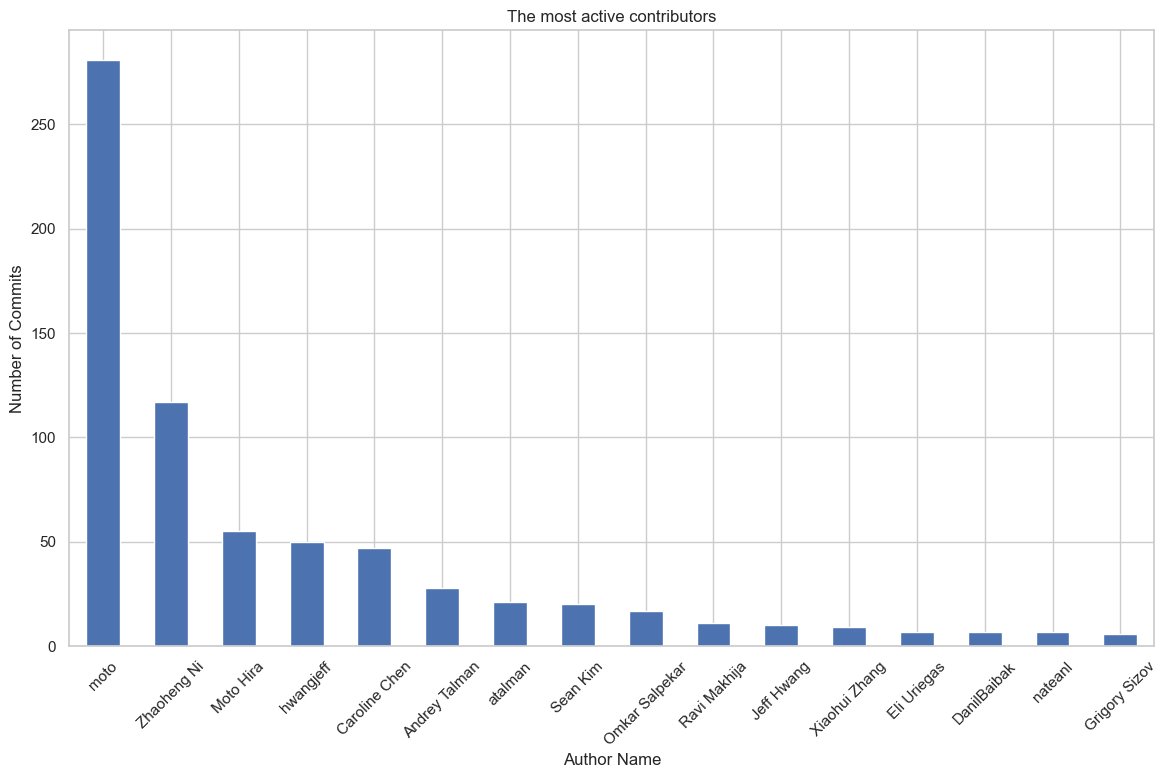

In [98]:
most_active_contributors = active_contributors > 5
ax = df['Author Name'].value_counts().head(most_active_contributors.sum()).plot(kind='bar', figsize=(14, 8))
ax.set_title('The most active contributors')
ax.set_xlabel('Author Name')
ax.set_ylabel('Number of Commits')
plt.xticks(rotation=45)
plt.show()

The frequency of commit

Text(0.5, 1.0, 'The frequency of commits')

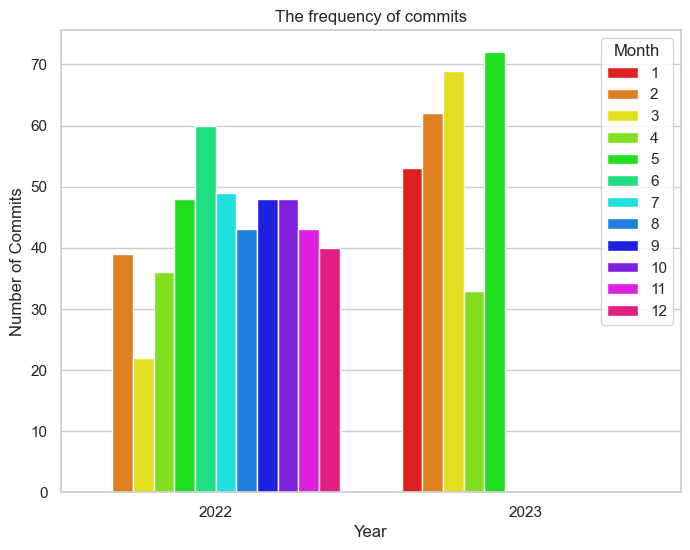

In [99]:
commit_frequency = commit_frequency.sort_values(by=['Year', 'Month'])
fig = plt.figure(figsize=(8, 6))
custom_palette = ['#FF0000', '#FF8000', '#FFFF00', '#80FF00', '#00FF00', '#00FF80',
                  '#00FFFF', '#0080FF', '#0000FF', '#8000FF', '#FF00FF', '#FF0080']
sns.barplot(data=commit_frequency, x='Year', y='Number of Commits', hue='Month', palette=custom_palette)
plt.legend(loc='upper right', title='Month')
plt.title('The frequency of commits')

The most common words in commit messages?

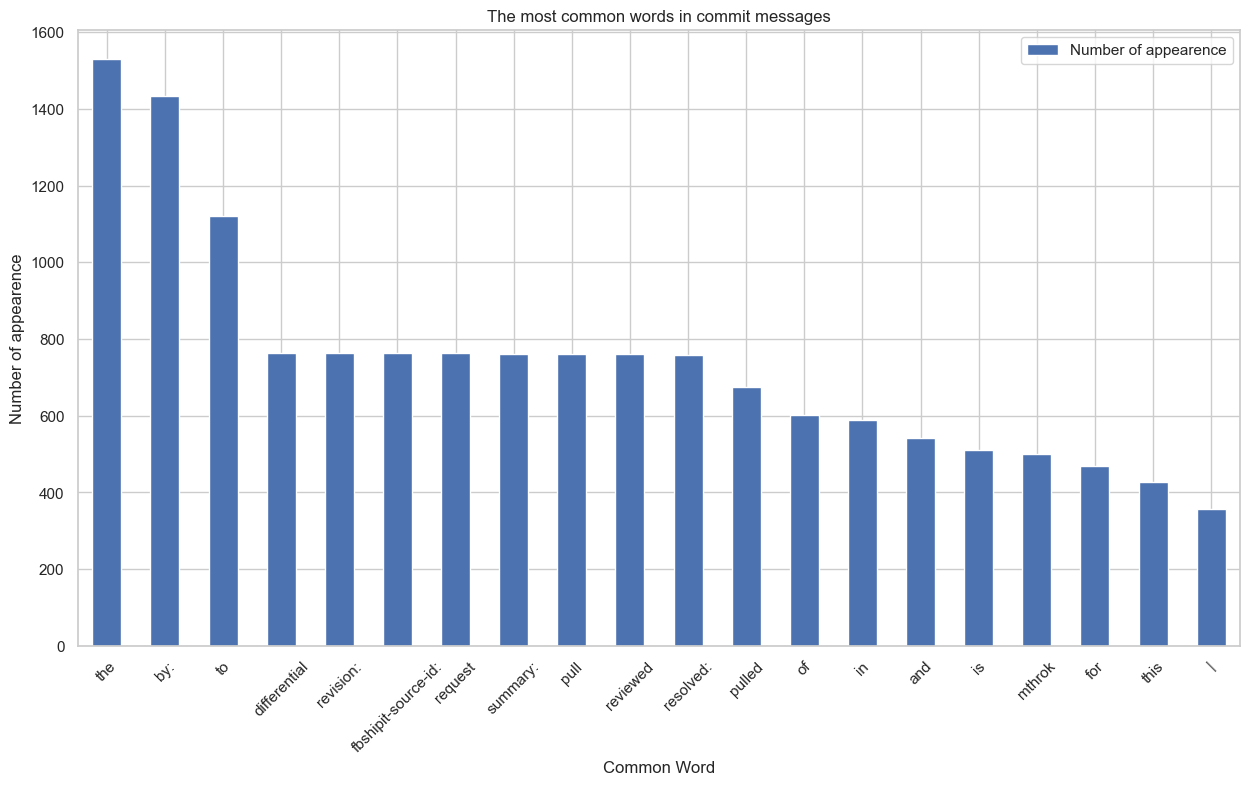

In [100]:
common_words = pd.DataFrame(most_common_words)
common_words.columns = ['Word', 'Number of appearence']
ax3 = common_words.plot(x='Word', y='Number of appearence', kind='bar', figsize=(15, 8))
ax3.set_xlabel('Common Word')
ax3.set_ylabel('Number of appearence')
ax3.set_title('The most common words in commit messages')
plt.xticks(rotation=45)
plt.show()

The most frequently changed files

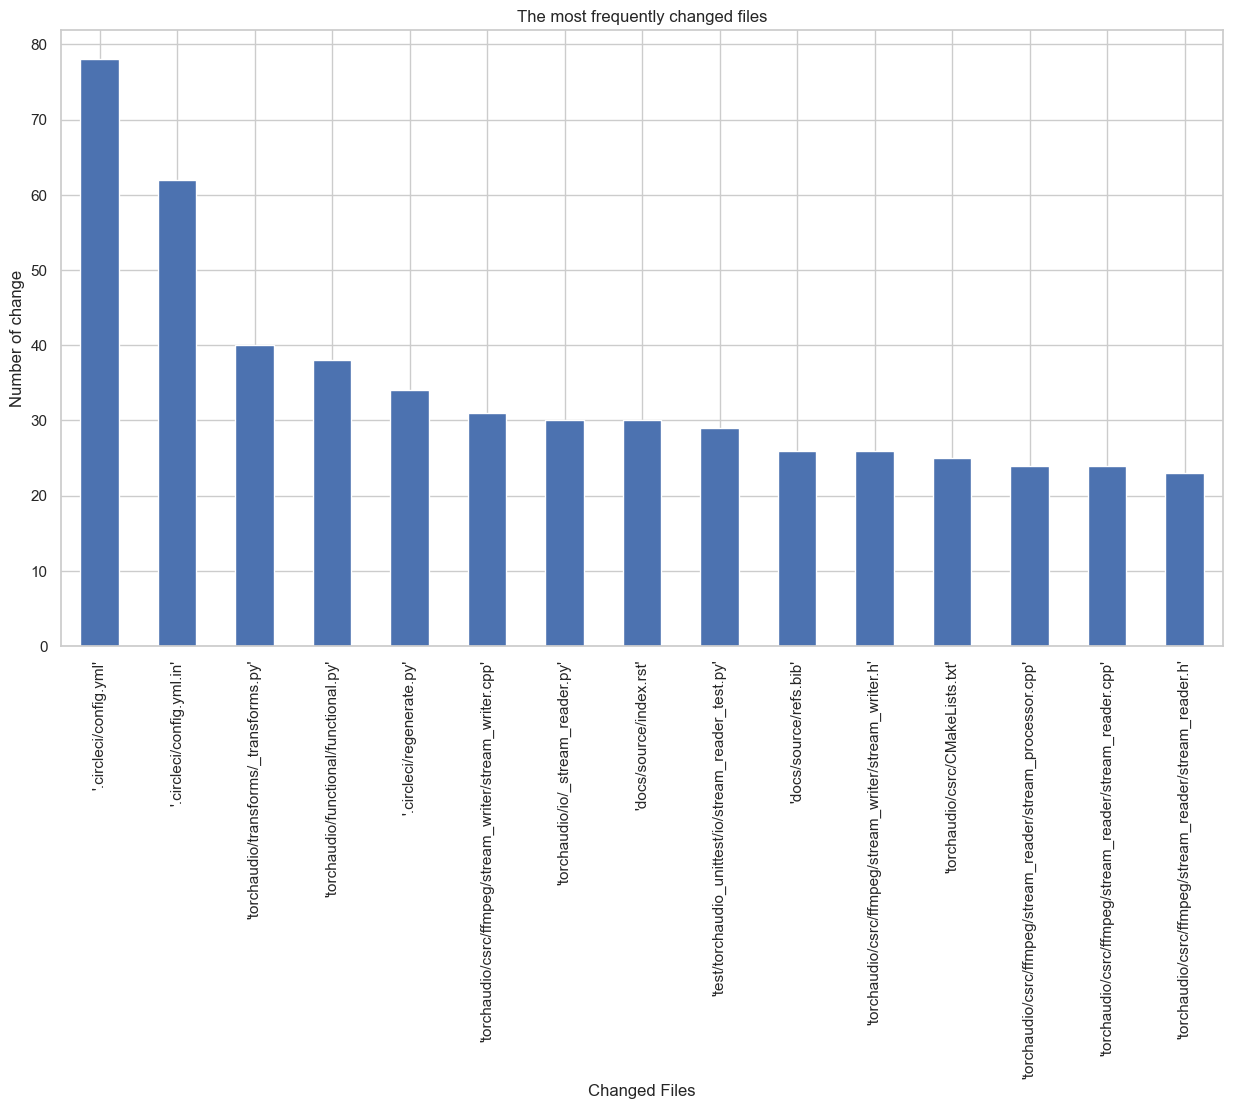

In [101]:
frequently_changed_files = pd.Series(file_counts)
frequently_changed_files.columns = ['Number of change']
ax4 = frequently_changed_files.head(15).plot(y='Number of change', kind='bar', figsize=(15,8))
ax4.set_xlabel('Changed Files')
ax4.set_ylabel('Number of change')
ax4.set_title('The most frequently changed files')
plt.show()

Pass rate of authors with the most commits

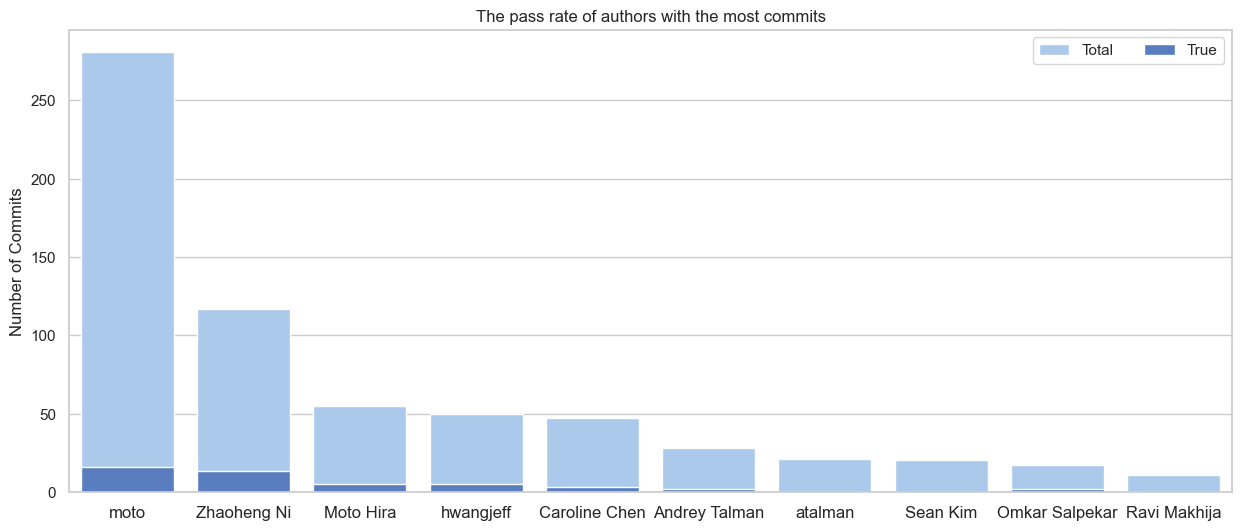

In [104]:
sns.set_theme(style='whitegrid')
f, ax = plt.subplots(figsize=(15, 6))

sns.set_color_codes('pastel')
sns.barplot(x='Author Name', y='Total', data=pass_percentage,
            label='Total', color='b')
sns.set_color_codes('muted')
sns.barplot(x='Author Name', y='True', data=pass_percentage,
            label='True', color='b')

ax.legend(ncol=2, loc='upper right', frameon=True)
ax.set(ylabel='Number of Commits', xlabel=None, title='The pass rate of authors with the most commits')

ax.set_xlim(-0.5, len(pass_percentage) - 0.5)
ax.set_xticklabels(ax.get_xticklabels(), ha='center')
ax.tick_params(axis='x', labelsize=12)

plt.show()

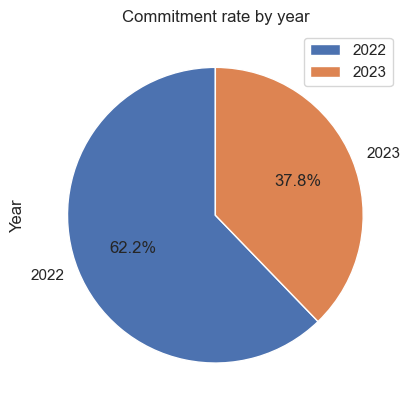

In [105]:
df['Year'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Commitment rate by year')
plt.legend()
plt.show()